In [2]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#rLeemos el csv
data = pd.read_csv("AusDataForRainPred.csv")

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Preparación de los datos:
Vamos a seleccionar un subconjunto específico de columnas y conviertir el DataFrame resultante en un array de NumPy.

**iloc[]:** Es un método de pandas que permite la selección por índices de posición (filas y columnas).

El **:** antes de la coma significa que seleccionas todas las filas.

los **[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]** después de la coma significa que seleccionas las columnas con los índices especificados. En este caso, las columnas con índices 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, y 21.

El **-1** después de la coma significa que seleccionas la última columna. En pandas, un índice negativo cuenta desde el final hacia el principio.

In [5]:
x = data.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
y = data.iloc[:,-1].values

In [6]:
print(x)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


#### Etiquetas para los ejes X e Y
**.unique()** es un método de pandas que devuelve los valores únicos de la serie. En este caso, devolverá una lista de los valores únicos presentes en la columna RainTomorrow, que son las clases de nuestro problema de clasificación.

In [7]:
class_names = data['RainTomorrow'].unique()

### Y como matriz bidimensional
El **reshape** es un método de NumPy que permite cambiar la forma de un array sin cambiar sus datos. La forma del array se especifica mediante una tupla de dimensiones.

**Descomposición de y.reshape(-1, 1):**
y: Es el array original que contiene la variable objetivo.
.reshape(): Es el método de NumPy utilizado para cambiar la forma del array.
-1: Este valor indica que el tamaño de esta dimensión debe ser inferido a partir del tamaño original del array y el tamaño de la otra dimensión especificada. En este caso, -1 permite que NumPy determine automáticamente el número correcto de filas basado en el tamaño del array original.
1: Este valor indica que la nueva forma debe tener exactamente una columna.

In [8]:
y =  y.reshape(-1,1)
print(y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 [nan]]


### Manejo valores faltantes en tus datos (x e y)
El **SimpleImputer**  que se utiliza para imputar (sustituir, rellenar) valores faltantes en los datos.

Los parámetros utilizados son:

**missing_values=np.nan**: Especifica que los valores faltantes en los datos están representados como np.nan (valores NaN de NumPy).

**strategy='most_frequent'**: Especifica que la estrategia de imputación será reemplazar los valores faltantes con el valor más frecuente (la moda) de la columna.

**fit_transform(x)**: Ajusta el imputador a x y luego transforma x reemplazando los valores faltantes con la moda de cada columna.

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
X = imputer.fit_transform(x)
Y = imputer.fit_transform(y)

In [10]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 20.0 ... 15.0 20.9 'No']]


In [11]:
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


 ### Transformar variables categóricas en variables numéricas.
El **LabelEncoder** asigna un número único a cada categoría en las columnas categóricas y a la variable de destino Y.

Se crea objetos LabelEncoder para cada columna categórica y para la variable de destino (Y).

y se transforma las variables categóricas en números enteros utilizando cada objeto LabelEncoder.

In [12]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])
le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])
le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])
le6 = LabelEncoder()
Y = le6.fit_transform(Y)

C:\Users\Hendrik\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
print(X)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]
 [41 14.9 20.0 ... 15.0 20.9 0]]


In [14]:
Y = Y.reshape(-1,1)
print(Y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [15]:
Y = np.array(Y,dtype=float)
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


### Normalización de los datos:

**StandardScaler**: Es una técnica común para escalar características (variables) de manera que tengan una media de 0 y una desviación estándar de 1. Esto es útil para algoritmos que asumen que las características están centradas alrededor de cero y tienen la misma escala.

**sc.fit_transform(X):** fit_transform primero ajusta (calcula la media y la desviación estándar) a los datos de entrada X y luego transforma X utilizando estas estadísticas para centrar los datos alrededor de cero y escalarlos.

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Introducción a las Pruebas y Validación

La validación y prueba de modelos son cruciales para verificar la eficacia y la seguridad antes de desplegar los modelos en producción. Esto incluye técnicas de validación cruzada y el uso de métricas de evaluación específicas para asegurar que los modelos funcionen bien en datos nuevos y desconocidos.


## Técnicas de Validación Cruzada

La validación cruzada es una técnica para evaluar la generalización de los modelos estadísticos. Aquí veremos cómo implementar la validación cruzada de K-folds utilizando Scikit-learn.




In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Implementación de K-Fold Cross Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

print(f"Resultados de CV: {cv_results}")
print(f"Promedio de CV: {cv_results.mean():.2f}")

C:\Users\Hendrik\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Hendrik\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Hendrik\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Hendrik\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

Resultados de CV: [0.85309788 0.85077769 0.85404314 0.85657199 0.85150174]
Promedio de CV: 0.85


### Explicación de los Resultados de la Validación Cruzada

#### Resultados de la Validación Cruzada

```plaintext
Resultados de CV: [0.85309788 0.85077769 0.85404314 0.85657199 0.85150174]
Promedio de CV: 0.85
```

#### Desglose de los Resultados

1. **Interpretación de los Resultados de CV**:

   Los resultados de la precición específicos para cada pliegue son:
   - **Primera iteración**: 0.85309788
   - **Segunda iteración**: 0.85077769
   - **Tercera iteración**: 0.85404314
   - **Cuarta iteración**: 0.85657199
   - **Quinta iteración**: 0.85150174

2. **Promedio de CV**:
   $$
   \text{Promedio de CV} = \frac{0.85309788 + 0.85077769 + 0.85404314 + 0.85657199 + 0.85150174}{5} = 0.85
   $$

#### Análisis de los Resultados

1. **Consistencia del Modelo**:
   - Como se puede observar tenemos resultados basntante consistentes ya que su variabilidad se presenta en el 0.00X y varia entre 0.850 y 0.856.
   - Esta consistencia sugiere que el modelo es robusto y no está demasiado ajustado a una sola partición del conjunto de datos, lo que es una buena indicación de su capacidad de generalización.

2. **Interpretación del Promedio de CV**:
   - Ahora bien el promedio de 0.85 indica que, en promedio, el modelo tiene una precisión del 85% en predecir correctamente las clases de las instancias en el conjunto de validación, lo cual si lo comparamos segun lo observado en el ejemplo del profesor es bastante bajo (95%) Sin embargo este aun asi es alto por lo que podria tener un rendimiento aceptable en general.

3. **Desempeño de los Pliegues Extremos**:
   - El valor más bajo (0.85077769) y el valor más alto 0.85657199) indican las variaciones en el desempeño del modelo en diferentes particiones del conjunto de datos.
   - La variabilidad es muy pequeña por lo cual podemos decir que poseen pocas variaciones ya sea por los datos manejados o que tal vez no estemos usando un modelo optimo..

#### Conclusión
La validación cruzada, con un promedio de precisión de 0.85 y resultados consistentes en todos los pliegues, indica que el modelo tiene cierta robustez y puede generalizar a un cierto grado. Sin embargo, esta evaluación es esencial para tener confianza en el modelo antes de su implementación en un entorno de producción. La validación cruzada ayuda a verificar que el modelo no esté sobreajustado a un solo conjunto de datos y que pueda mantener su rendimiento cuando se enfrente a datos no vistos. Sin embargo, la disminución en la precisión podría sugerir que quizás se esté utilizando un modelo inadecuado para los datos en cuestión.

### Matriz de Confusión

Una matriz de confusión proporciona una representación tabular del rendimiento de un algoritmo de clasificación, mostrando el número de instancias clasificadas correctamente e incorrectamente para cada clase. Vamos a interpretar la matriz de confusión proporcionada:


C:\Users\Hendrik\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


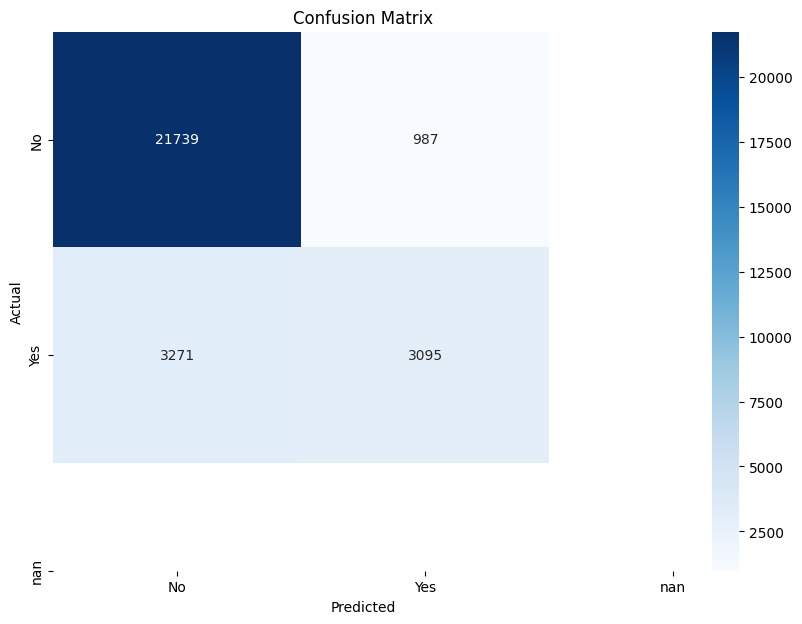

In [20]:
# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando Matplotlib y Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
cm

array([[21739,   987],
       [ 3271,  3095]], dtype=int64)

### Interpretación de la Matriz de Confusión

 Vamos a interpretar la matriz de confusión proporcionada:

```plaintext
        [[21739,   987],
       [ 3271,  3095]]
```

#### Estructura de la Matriz de Confusión
La matriz tiene la siguiente estructura:

```
              Predicted Class
              |   No Llueve   |   Llueve   |
Actual Class  |---------------|------------|
    No Llueve |  TP           |       FP   |
              |---------------|------------|
    Llueve    |  FN           |       TN   |
```

Donde:
- **TP (True Positive)**: Número de instancias que fueron predichas como 'No Llueve' y realmente eran 'No Llueve'.
- **FP (False Positive)**: Número de instancias que fueron predichas como 'Llueve' pero realmente eran 'No Llueve'.
- **FN (False Negative)**: Número de instancias que fueron predichas como 'No Llueve' pero realmente eran 'Llueve'.
- **TN (True Negative)**: Número de instancias que fueron predichas como 'Llueve' y realmente eran 'Llueve'.

#### Interpretación de los Resultados

1. **True Positives (TP)**:
   - **Valor**: 21739
   - **Interpretación**: El modelo predijo correctamente 21739 instancias como "No Llueve".

2. **False Positives (FP)**:
   - **Valor**: 987
   - **Interpretación**: El modelo incorrectamente predijo 987 instancias como "Llueve" cuando era "No Llueve".

3. **False Negatives (FN)**:
   - **Valor**: 3271
   - **Interpretación**: El modelo incorrectamente predijo 3271 instancia como "No Llueve" cuando era "Llueve".
4. **True Negatives (TN)**:
   - **Valor**: 3095
   - **Interpretación**: El modelo predijo correctamente 3095 instancias como "Llueve".


### Conclusión
Como podemos observar el modelo indicó que cuando se trata de no lluvia es bastante acertado sin embargo al ver las FN podemos ver que el modelo está perdiendo muchas instancias que en realidad era LLueve. 